<a href="https://colab.research.google.com/github/whyrzky/DS-Portfolio-Projects/blob/main/Machine%20Learning%3A%20Marketing%20Channel%20Attribution%20with%20Attribution%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Package

In [ ]:
# channel attribution analysis and markov modeling
!pip install marketing_attribution_models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from marketing_attribution_models import MAM

%matplotlib inline

#Load Data

In [ ]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/campaign_data/campaign_data.csv")

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cookie            650000 non-null  object 
 1   time              650000 non-null  object 
 2   interaction       650000 non-null  object 
 3   conversion        650000 non-null  int64  
 4   conversion_value  650000 non-null  float64
 5   channel           650000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 29.8+ MB


In [ ]:
raw_data.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,9AACfh9fhA7EEn0fn0hihDBfD,2018-07-21T23:25:13Z,impression,0,0.0,Instagram
1,CoCko0ih7EF993ABBoCnC9F3F,2018-07-13T22:49:52Z,impression,0,0.0,Facebook
2,hB9o3if3A33F0Eh97EDhEk9F7,2018-07-07T22:20:16Z,impression,0,0.0,Facebook
3,hB9o3if3A33F0Eh97EDhEk9F7,2018-07-07T22:20:48Z,impression,0,0.0,Facebook
4,99E9ohDDhnkiCDofo7k73nii0,2018-07-29T09:23:04Z,impression,0,0.0,Paid Search


In [ ]:
raw_data.isna().sum()

cookie              0
time                0
interaction         0
conversion          0
conversion_value    0
channel             0
dtype: int64

# Attribution Analysis

In [ ]:
raw_data

,cookie,time,interaction,conversion,conversion_value,channel
0,9AACfh9fhA7EEn0fn0hihDBfD,2018-07-21T23:25:13Z,impression,0,0.0,Instagram
1,CoCko0ih7EF993ABBoCnC9F3F,2018-07-13T22:49:52Z,impression,0,0.0,Facebook
2,hB9o3if3A33F0Eh97EDhEk9F7,2018-07-07T22:20:16Z,impression,0,0.0,Facebook
3,hB9o3if3A33F0Eh97EDhEk9F7,2018-07-07T22:20:48Z,impression,0,0.0,Facebook
4,99E9ohDDhnkiCDofo7k73nii0,2018-07-29T09:23:04Z,impression,0,0.0,Paid Search
...,...,...,...,...,...,...
649995,Af3Dohk39k73DoknC7EokAB3A,2018-07-07T12:44:35Z,impression,0,0.0,Paid Search
649996,Af3Dohk39k73DoknC7EokAB3A,2018-07-14T11:28:22Z,impression,0,0.0,Facebook
649997,Af3Dohk39k73DoknC7EokAB3A,2018-07-15T11:51:17Z,impression,0,0.0,Facebook
649998,Af3Dohk39k73DoknC7EokAB3A,2018-07-18T13:33:38Z,impression,0,0.0,Facebook


In [ ]:
aggregated_data = raw_data.groupby(['cookie', 'time', 'channel'],as_index=False).agg(
    {
        'conversion': 'sum',
        'conversion_value': 'sum'
    }
).sort_values(by=['conversion'], ascending = False).copy()

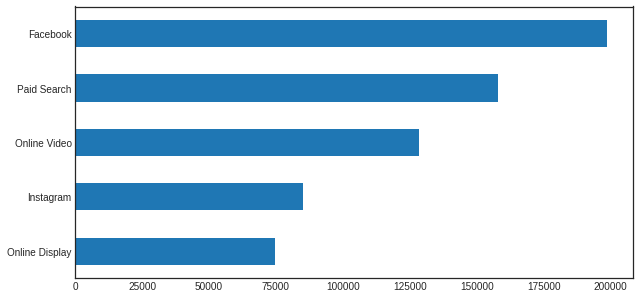

In [ ]:
plt.figure(figsize=(10,5))
aggregated_data['channel'].value_counts(ascending=True).plot(kind='barh')
plt.show()

In [ ]:
# plt.figure(figsize=(10,5))
aggregated_data.groupby(['channel'], as_index=False).size().sort_values(by=['size'], ascending = False)
# plt.show()

,channel,size
0,Facebook,198402
4,Paid Search,158072
3,Online Video,128538
1,Instagram,85136
2,Online Display,74487


## AVG Rev per Channel

In [ ]:
channel_attribute_value = aggregated_data.assign(
    n_events = 0
).groupby(
    ['channel'], as_index=False
).agg({
    'n_events': 'size',
    'conversion': 'sum',
    'conversion_value': 'sum'
}
).assign(
    revenue_per_conversion = lambda x: x['conversion_value']/x['n_events']
).sort_values(by=['conversion_value'], ascending=False).copy()

In [ ]:
channel_attribute_value

,channel,n_events,conversion,conversion_value,revenue_per_conversion
0,Facebook,198402,6052,37786.5,0.190454
4,Paid Search,158072,4768,29703.5,0.187911
3,Online Video,128538,3992,25093.0,0.195219
1,Instagram,85136,2555,15989.5,0.187811
2,Online Display,74487,2246,13956.5,0.187368


<Figure size 1080x72 with 0 Axes>

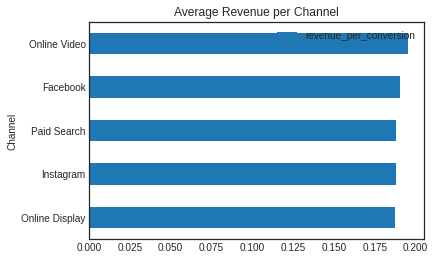

In [ ]:
plt.figure(figsize=(15,1))
channel_attribute_value[['channel', 'revenue_per_conversion']].sort_values(
  by = ['revenue_per_conversion'],
  ascending = True 
).plot(
    x = 'channel', 
    y = 'revenue_per_conversion', 
    kind = 'barh',
    title = 'Average Revenue per Channel',
    xlabel = 'Channel',
    ylabel = 'Revenue per Conversion'
)
plt.show()

## Conv per Channel

<Figure size 720x360 with 0 Axes>

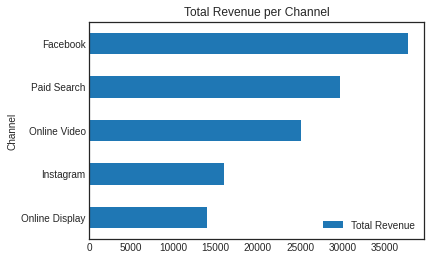

In [ ]:
plt.figure(figsize=(10,5))
channel_attribute_value[['channel', 'conversion_value']].sort_values(
  by = ['conversion_value'],
  ascending = True 
).rename(
    columns = {'conversion_value':'Total Revenue'}
).plot(
    x = 'channel', 
    y = 'Total Revenue', 
    kind = 'barh',
    title = 'Total Revenue per Channel',
    xlabel = 'Channel',
    ylabel = 'Total Revenue'
)
plt.show()

#Channel Attribution Model

## Heuristic Model

In [ ]:
raw_data.columns

Index(['cookie', 'time', 'interaction', 'conversion', 'conversion_value',
       'channel', 'has_transaction'],
      dtype='object')

In [ ]:
# data preprocessing
raw_data['conversion_value'].fillna(0, inplace=True)
raw_data['has_transaction'] = raw_data.conversion.apply(lambda x: True if x > 0 else False)

In [ ]:
data_for_model = raw_data[['cookie', 'channel', 'time','interaction','conversion', 'conversion_value', 'has_transaction']]

In [ ]:
attribution = MAM(
    data_for_model, 
    channels_colname='channel',
    group_channels=True, 
    group_channels_by_id_list=['cookie'], 
    group_timestamp_colname='time',
    journey_with_conv_colname='has_transaction',
    create_journey_id_based_on_conversion = True,
    conversion_value='conversion_value'
)

In [ ]:
attribution.attribution_last_click()

(0                   [0.0, 0.0, 0.0, 0.0]
 1         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 2              [0.0, 0.0, 0.0, 0.0, 0.0]
 3                                  [0.0]
 4                                  [0.0]
                        ...              
 252459                             [0.0]
 252460                             [0.0]
 252461                   [0.0, 0.0, 0.0]
 252462                        [0.0, 0.0]
 252463                             [0.0]
 Length: 252464, dtype: object, channels
 Facebook          37786.5
 Instagram         15989.5
 Online Display    13956.5
 Online Video      25093.0
 Paid Search       29703.5
 Name: value, dtype: float64)

In [ ]:
attribution.attribution_first_click()

(0                   [0.0, 0.0, 0.0, 0.0]
 1         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 2              [0.0, 0.0, 0.0, 0.0, 0.0]
 3                                  [0.0]
 4                                  [0.0]
                        ...              
 252459                             [0.0]
 252460                             [0.0]
 252461                   [0.0, 0.0, 0.0]
 252462                        [0.0, 0.0]
 252463                             [0.0]
 Length: 252464, dtype: object,
          channels  attribution_first_click_heuristic
 0        Facebook                            36848.5
 1       Instagram                            16470.0
 2  Online Display                            14109.5
 3    Online Video                            23894.0
 4     Paid Search                            31207.0)

In [ ]:
attribution.attribution_linear()

(0                   [0.0, 0.0, 0.0, 0.0]
 1         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 2              [0.0, 0.0, 0.0, 0.0, 0.0]
 3                                  [0.0]
 4                                  [0.0]
                        ...              
 252459                             [0.0]
 252460                             [0.0]
 252461                   [0.0, 0.0, 0.0]
 252462                        [0.0, 0.0]
 252463                             [0.0]
 Length: 252464, dtype: object,          channels  attribution_linear_heuristic
 0        Facebook                  37211.167922
 1       Instagram                  16069.338769
 2  Online Display                  13888.247638
 3    Online Video                  24729.164451
 4     Paid Search                  30631.081220)

## Attribution Plot of Heuristic Model

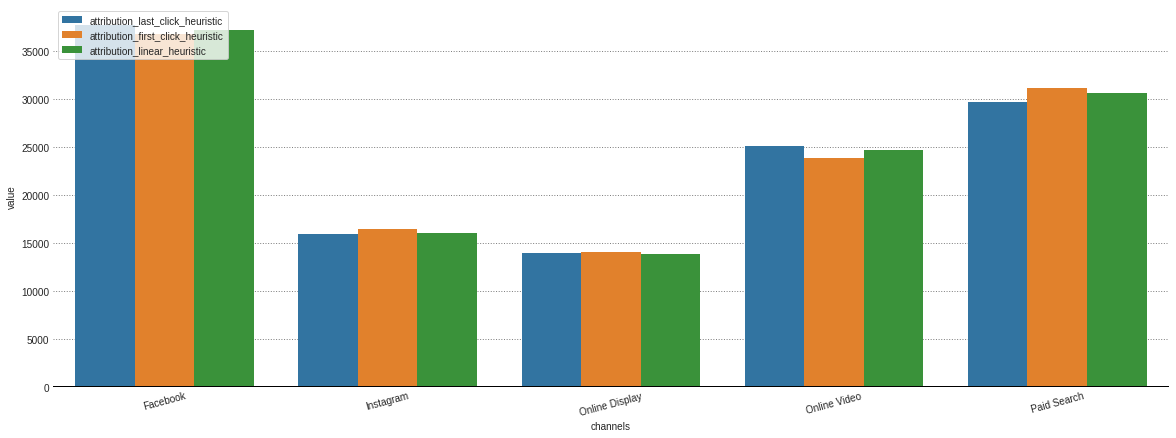

In [ ]:
attribution.plot(model_type='heuristic');

So, the company should prioritize Facebook, Paid Search, and Online Video to optimalize ads budget for those to make more conversion_revenue. In the click attribute, there is no significant differences both last click and first click.

## Markov Model

In [ ]:
# create markov results
markov_results = attribution.attribution_markov(transition_to_same_state=False)

In [ ]:
# check markov results
markov_results[1]

,channels,attribution_markov_algorithmic
0,Online Video,20799.582988
1,Facebook,36934.593916
2,Paid Search,26016.675622
3,Instagram,25470.052749
4,Online Display,13308.094725


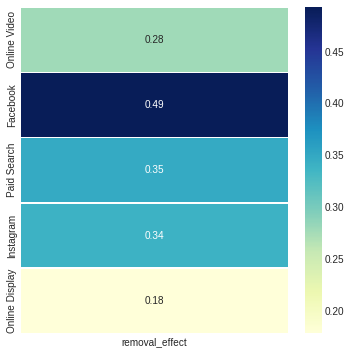

In [ ]:
# check removal effects
ax, fig = plt.subplots(figsize=(6,6))
sns.heatmap(
    markov_results[3].round(3), 
    cmap="YlGnBu", 
    annot=True, 
    linewidths=.5
);

So, the company should be aware for this removal effect. Facebook is higher effect to the conversion_value. Followed by Paid Search (35%), Instagram (34%), Online video (28%), and Online Display (18%).

Removal effect define that if we remove a channel, then the channel will give (%) the effect to the conversion_value.

## Attribution Plot of Markov Model

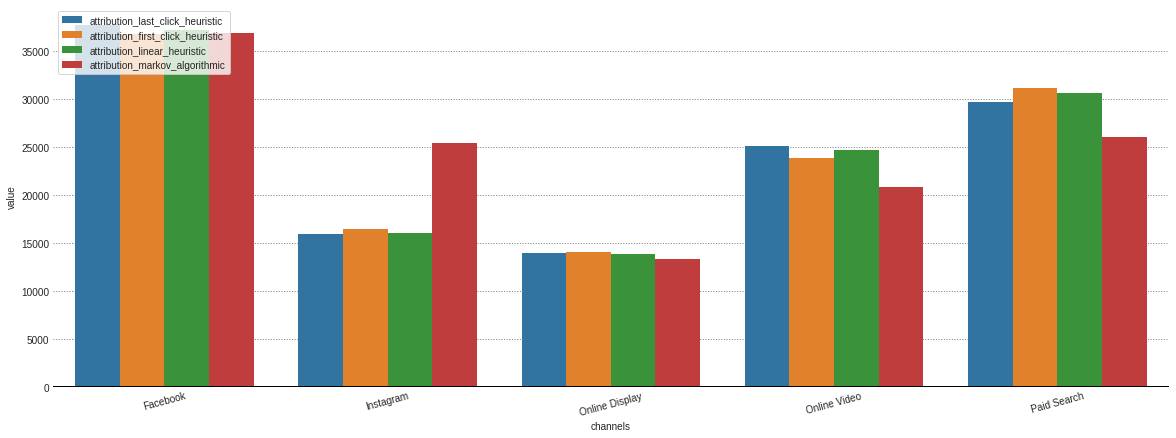

In [ ]:
attribution.plot();

In the Markov Model probabolity, they recommend that we prioritize Facebook, Paid Search, and Instagram to optimize the ads budget for those that generate more conversion_revenue.